Bootstrap (100 draws):   0%|          | 0/100 [00:00<?, ?draw/s]

/Users/raunaqrai/miniforge3/envs/jwst/lib/python3.12/site-packages/PyRSR/line_fit.py:1006: RuntimeWarning: All-NaN slice encountered
  med = np.nanmedian(a, axis=axis)
/Users/raunaqrai/miniforge3/envs/jwst/lib/python3.12/site-packages/PyRSR/line_fit.py:1007: RuntimeWarning: All-NaN slice encountered
  mad = 1.4826 * np.nanmedian(np.abs(a - np.expand_dims(med, axis=axis)), axis=axis)
/Users/raunaqrai/miniforge3/envs/jwst/lib/python3.12/site-packages/PyRSR/line_fit.py:1014: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis), np.nanstd(a, axis=axis)
/Users/raunaqrai/miniforge3/envs/jwst/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


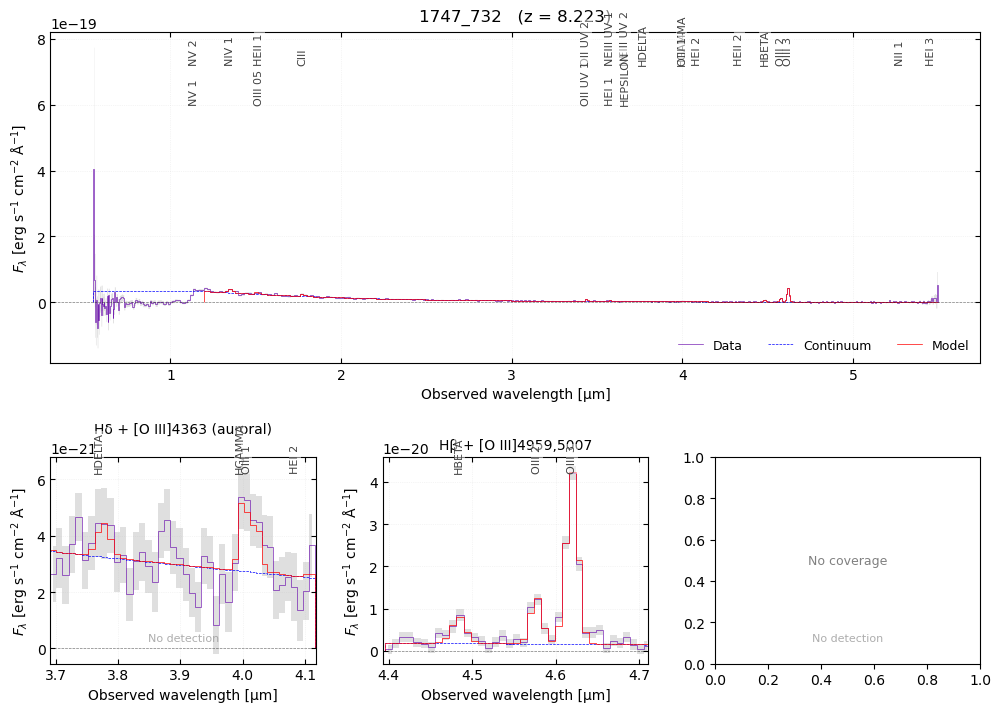

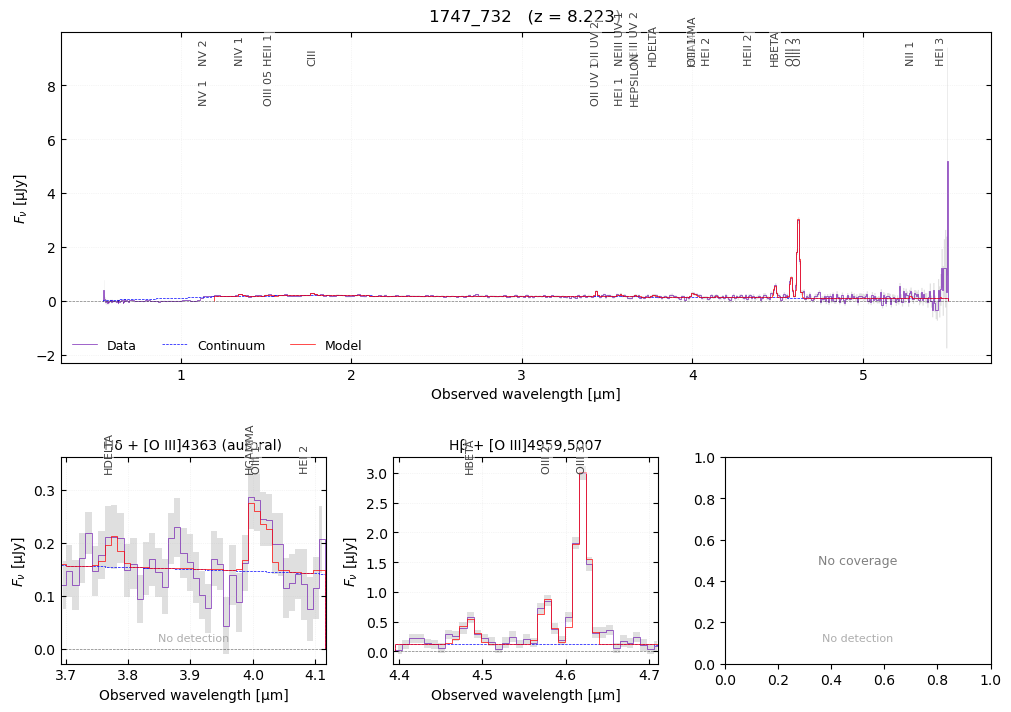


=== BOOTSTRAP SUMMARY (value ± error) ===
Line               F_line [erg/s/cm²]          EW₀ [Å]        σ_A [Å]        μ_obs [Å]    SNR_int   SNR_peak(data)    SNR_peak(model)
-----------------------------------------------------------------------------------------------------------------------------
NV_1            1.229e-18 ± 8.369e-19      4.00 ± 2.78   80.29 ± 9.77  11466.4 ± 158.7 0.63 ± 0.44      0.96 ± 0.40        0.73 ± 0.50
NV_2            3.456e-18 ± 1.028e-18     11.22 ± 3.52   84.04 ± 8.47  11543.7 ± 255.2 1.70 ± 0.45      1.09 ± 0.40        1.63 ± 0.39
NIV_1           3.825e-18 ± 1.045e-18     14.24 ± 4.15 115.31 ± 27.59   13518.3 ± 66.7 2.12 ± 0.53      1.69 ± 0.40        2.12 ± 0.50
HEII_1          1.748e-18 ± 5.201e-19      7.58 ± 2.36   80.15 ± 6.50   15125.7 ± 98.3 1.17 ± 0.39      1.08 ± 0.34        1.39 ± 0.46
OIII_05         1.679e-18 ± 5.471e-19      7.64 ± 2.56   81.54 ± 2.70  15191.2 ± 173.9 0.99 ± 0.38      1.10 ± 0.35        1.20 ± 0.57
CIII            2.448e

In [1]:
from astropy.io import fits
import numpy as np
from PyRSR.line_fit import bootstrap_excels_fit, print_bootstrap_line_table

# --- inputs ---
specfile = "../../data/borg-v4_prism-clear_1747_732.spec.fits"
z = 8.22288
grating = "PRISM"
deg = 2
target_msaid = "1747_732"

# --- compute Lyα break (observed) and the data's max wavelength ---
with fits.open(specfile) as hdul:
    d1 = hdul["SPEC1D"].data
    lam_um_all = np.asarray(d1["wave"], float)

ly_um = 1215.67 * (1.0 + z) / 1e4          
fit_window_um = (ly_um, float(np.nanmax(lam_um_all)))

import os
os.makedirs("bootstrap_results", exist_ok=True)


# ========== 2) Bootstrap (also restricted to ≥ Lyα) ==========
with fits.open(specfile) as hdul:
    boot = bootstrap_excels_fit(
        source=hdul,
        z=z,
        grating=grating,
        source_id=target_msaid,
        n_boot=100,
        deg=deg,
        continuum_windows=([1.2, 3], [3, 5.5]),
        fit_window_um=fit_window_um,  
        plot=True,
        show_progress=True,
        save_path=None,
    )

print_bootstrap_line_table(boot)
